In [10]:
import glob
import json
import os
import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth',500)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from ipywidgets import interact
from IPython.display import display, HTML, SVG
# keras
from keras.models import model_from_json
from keras.utils.visualize_util import model_to_dot

In [11]:
module_root = '..'
import sys,os
sys.path.append(module_root)
from project import settings as s
logs_folder = os.path.join(s.intermediate_folder, 'logs', 'Test3')
#logs_folder = os.path.join(s.intermediate_folder, 'logs', 'Test7_3')
#logs_folder = os.path.join(s.intermediate_folder, 'logs', 'Test7')

In [12]:
csv_logs_folder = os.path.join(logs_folder , 'csv_logs')
data_logs_folder = os.path.join(logs_folder , 'data_logs')
model_logs_folder = os.path.join(logs_folder , 'model_logs')
train_logs_folder = os.path.join(logs_folder , 'train_logs')

In [13]:
files = glob.glob(csv_logs_folder + '/*.log')
print(len(files))
for file_name in files:
    print(file_name)

5
/media/mehrtash/mehrtash/Dropbox (Partners HealthCare)/Prostate/Prostate-Zonal-Segmentation/intermediate/logs/Test3/csv_logs/2017_03_10_12_04_03_unet.log
/media/mehrtash/mehrtash/Dropbox (Partners HealthCare)/Prostate/Prostate-Zonal-Segmentation/intermediate/logs/Test3/csv_logs/2017_03_10_11_26_22_unet.log
/media/mehrtash/mehrtash/Dropbox (Partners HealthCare)/Prostate/Prostate-Zonal-Segmentation/intermediate/logs/Test3/csv_logs/2017_03_10_11_36_04_unet.log
/media/mehrtash/mehrtash/Dropbox (Partners HealthCare)/Prostate/Prostate-Zonal-Segmentation/intermediate/logs/Test3/csv_logs/2017_03_10_11_53_47_unet.log
/media/mehrtash/mehrtash/Dropbox (Partners HealthCare)/Prostate/Prostate-Zonal-Segmentation/intermediate/logs/Test3/csv_logs/2017_03_10_11_26_41_unet.log


In [14]:
def plot_training_results(train,validation, loss,dice , keyword):
    csvs = sorted(glob.glob(csv_logs_folder + '/*.log'))
    plt.figure(figsize=(10, 8))
    for csv_file in csvs:
        if os.path.getsize(csv_file) > 0:
            data = np.genfromtxt(csv_file, delimiter=',',dtype = None,names = True)
            uid = os.path.split(csv_file)[1].split('.')[0]
            if keyword in uid :
                if validation:
                    if loss:
                        plt.plot(data['epoch'], data['val_loss'], label= uid +' Val Loss')
                        # print(data['val_loss'])
                    if dice:
                        plt.plot(data['epoch'], data['val_dice_coef'], label= uid  +' Val Dice')
                if train:
                    if loss:
                        plt.plot(data['epoch'], data['loss'], label= uid +' Train Loss')
                    if dice:
                        plt.plot(data['epoch'], data['dice_coef'], label= uid +' Train Dice')
        # plt.ylabel('Accuracy %')
    plt.xlabel('Epoch')
    plt.legend()

<function __main__.plot_training_results>

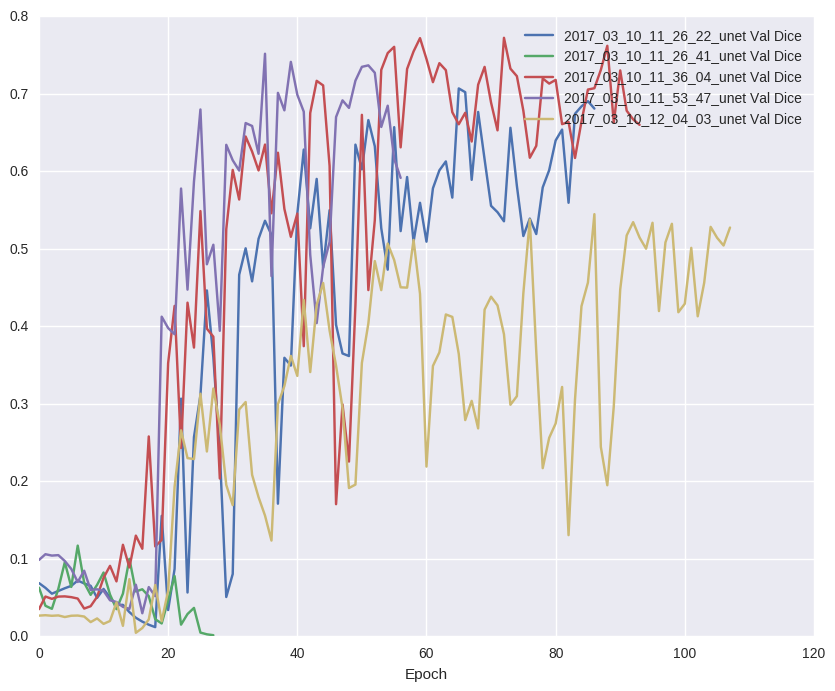

In [15]:
interact(plot_training_results,train=False,validation=True, loss = False, dice=True, keyword='')

In [7]:
def f(uid, val_curves, data, train, model_summary, model_diagram):
    train_log= glob.glob(train_logs_folder + '/' +uid + '*.csv')[0]
    train_df =pd.read_csv(train_log, header=None)
    # data_log = glob.glob(data_logs_folder+  '/' + uid + '*.csv')[0]
    #data_df =pd.read_csv(data_log, header=None)
    model_log = glob.glob(model_logs_folder +  '/' +  uid + '*.json')[0]
    with open(model_log) as model_file:    
        json_string = json.load(model_file)
    #model = model_from_json(json_string)
    csv_log = glob.glob(csv_logs_folder + '/' + uid + '*.log')[0]
    log_arr = np.genfromtxt(csv_log, delimiter=',',dtype = None,names = True)
    if val_curves:
        plt.figure(figsize=(10, 5))
        #plt.subplot(1, 2, 1)
        plt.plot(log_arr['epoch'], log_arr['val_acc'])
        plt.ylabel('VAL Accuracy')
        plt.xlabel('Epoch')
        #plt.subplot(1, 2, 2)
        #plt.plot(log_arr['epoch'], log_arr['auc'])
        plt.ylabel('VAL AUC')
        plt.xlabel('Epoch')
    print('display data: {}, train: {}'.format(data, train))
    if train:
        display(train_df)
    #if data:
    #    display(data_df)
    '''
    if model_summary:
        print(model.summary())
    if model_diagram:
        dot = model_to_dot(model).create(prog='dot', format='svg')
        return SVG(dot)
    '''

In [8]:
csvs = glob.glob(csv_logs_folder + '/*.log')
uids = []
for csv_file in csvs:
    uid = os.path.split(csv_file)[1].split('.')[0]
    uids.append(uid)
uids = sorted(uids)

In [9]:
interact(f, uid=uids, val_curves = True, data=False, 
         train= True, model_summary=False, model_diagram=False);

ValueError: no field of name val_acc

In [10]:
from cnn.nets.hodor import Hodor

In [13]:
hodor = Hodor(initial_lr=0, l2_penalty=0.05)

In [15]:
model = hodor.model()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 1, None, None) 0                                            
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 16, None, None 160         input_1[0][0]                    
____________________________________________________________________________________________________
batchnormalization_1 (BatchNorma (None, 16, None, None 64          convolution2d_1[0][0]            
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 16, None, None 0           batchnormalization_1[0][0]       
___________________________________________________________________________________________

In [36]:
n_trainable = 12
n_conv_layers = 0
for layer in model[0].layers:
    config = layer.get_config()
    if 'convolution2d' in config['name']:
        n_conv_layers +=1
for layer in model[0].layers:
    config = layer.get_config()
    if config['name'] in ['convolution2d_'+str(n_trainable) for n_trainable in range(n_conv_layers,n_trainable,-1)] :
        print(config['name'])

convolution2d_13
convolution2d_14
convolution2d_15
